# Used Cars price prediction

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

Used Car Model - This shows the car model names

Year of Manufacture - Gives us the year in which the car was made

Kilometers Driven - Number of kilometers the car the driven reflecting on the Odometer

Fuel Type - Shows the fuel type used by the vehicle

Transmission Type - Gives us the manual or automatic gear shifting mechanism

Used Car Price - Lists the selling price of the used cars

Location - Gives us the place where the used cars belong to.

# Import Libraries

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [157]:
df=pd.read_csv("used_cars.csv")
df.head()

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price,Location
0,Hyundai,2017,"2,200 km",Petrol,Manual,"5,25,000",Delhi
1,Hyundai,2013,"91,500 km",Diesel,Manual,"5,95,000",Delhi
2,Ford,2017,"36,000 km",Diesel,Manual,"7,75,000",Delhi
3,Honda,2015,"90,000 km",Diesel,Manual,"4,00,000",Delhi
4,Maruti Suzuki,2010,"40,000 km",Petrol,Manual,"2,30,000",Delhi


# EDA

In [158]:
pd.set_option('display.max_rows', None)

In [159]:
df.head(10)

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price,Location
0,Hyundai,2017,"2,200 km",Petrol,Manual,"5,25,000",Delhi
1,Hyundai,2013,"91,500 km",Diesel,Manual,"5,95,000",Delhi
2,Ford,2017,"36,000 km",Diesel,Manual,"7,75,000",Delhi
3,Honda,2015,"90,000 km",Diesel,Manual,"4,00,000",Delhi
4,Maruti Suzuki,2010,"40,000 km",Petrol,Manual,"2,30,000",Delhi
5,Maruti Suzuki,2020,"19,000 km",Petrol,Manual,"4,55,000",Delhi
6,BMW,2018,"49,000 km",Diesel,Automatic,"54,00,000",Delhi
7,Audi,2016,"36,000 km",Diesel,Automatic,"24,00,000",Delhi
8,Mahindra,2011,"95,000 km",Diesel,Manual,"3,65,000",Delhi
9,Ford,2016,"68,000 km",Diesel,-,"6,20,000",Delhi


In [160]:
df.shape

(8348, 7)

In [161]:
df.columns

Index(['Used Car Model', 'Year of Manufacture', 'Kilometers Driven',
       'Fuel Type', 'Transmission Type', 'Used Car Price', 'Location'],
      dtype='object')

# Check for Null Values

In [162]:
df.isnull().sum()

Used Car Model         0
Year of Manufacture    0
Kilometers Driven      0
Fuel Type              0
Transmission Type      0
Used Car Price         0
Location               0
dtype: int64

we have no missing values, we have records with "-" in it which needs to be dealt with.

In [163]:
df.dtypes

Used Car Model         object
Year of Manufacture    object
Kilometers Driven      object
Fuel Type              object
Transmission Type      object
Used Car Price         object
Location               object
dtype: object

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8348 entries, 0 to 8347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Used Car Model       8348 non-null   object
 1   Year of Manufacture  8348 non-null   object
 2   Kilometers Driven    8348 non-null   object
 3   Fuel Type            8348 non-null   object
 4   Transmission Type    8348 non-null   object
 5   Used Car Price       8348 non-null   object
 6   Location             8348 non-null   object
dtypes: object(7)
memory usage: 456.7+ KB


# To Find Unique Values

In [165]:
df.nunique().sort_values()

Transmission Type         3
Fuel Type                 6
Location                  6
Year of Manufacture      31
Used Car Price          909
Kilometers Driven      1038
Used Car Model         1996
dtype: int64

we can see the number of unique values present in each of the columns in our dataset.

# Data pre processing

In [166]:
df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: x.replace(',','') if x!='-' else '-')

In [167]:
df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: int(x.split(' ')[0]) if x!='-' else 0)

In [168]:
df.head()

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price,Location
0,Hyundai,2017,2200,Petrol,Manual,"5,25,000",Delhi
1,Hyundai,2013,91500,Diesel,Manual,"5,95,000",Delhi
2,Ford,2017,36000,Diesel,Manual,"7,75,000",Delhi
3,Honda,2015,90000,Diesel,Manual,"4,00,000",Delhi
4,Maruti Suzuki,2010,40000,Petrol,Manual,"2,30,000",Delhi


The Kilometers Driven column had km extentions that needed to be changed to the numeric data.

In [169]:
try:
    df["Used Car Price"]=df["Used Car Price"].apply(lambda x: x.split(' ')[1])
except IndexError:
    pass


In [170]:
try:
    df["Used Car Price"]=df["Used Car Price"].apply(lambda x: str(x.replace(',', '')))
except ValueError:
    pass

In [171]:
df["Used Car Price"]=pd.to_numeric(df["Used Car Price"].str.replace('-','0'))

In [172]:
df["Used Car Price"]=df["Used Car Price"].astype(float)

In [173]:
df.head()

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price,Location
0,Hyundai,2017,2200,Petrol,Manual,525000.0,Delhi
1,Hyundai,2013,91500,Diesel,Manual,595000.0,Delhi
2,Ford,2017,36000,Diesel,Manual,775000.0,Delhi
3,Honda,2015,90000,Diesel,Manual,400000.0,Delhi
4,Maruti Suzuki,2010,40000,Petrol,Manual,230000.0,Delhi


The target variable was object type, now we have converted it to proper float typedata

In [174]:
df["Year of Manufacture"]=df["Year of Manufacture"].apply(lambda x: int(x.strip()[0:4]) if x!='-' else 0)
df["Year of Manufacture"]=df["Year of Manufacture"].apply(lambda x: x if x!=0 else df["Year of Manufacture"].median())
df["Year of Manufacture"]=df["Year of Manufacture"].astype(int)

To change year of Manufacture to numeric data, we have converted '-' to median values.

In [175]:
df["Fuel Type"]=df["Fuel Type"].apply(lambda x: x if x!='-' else df["Fuel Type"].mode()[0]) # replacing with common fuel type in india
df["Transmission Type"]=df["Transmission Type"].apply(lambda x: x if x!='-' else df["Transmission Type"].mode()[0]) # common transmission is manual
df["Used Car Model"]=df["Used Car Model"].apply(lambda x: x if x!='-' else df["Used Car Model"].mode()[0]) # common used car model
df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: x if x!='-' else 'None')
df["Used Car Price"]=df["Used Car Price"].apply(lambda x: x if x!='-' else df["Used Car Price"].mean()) # average used car prices


In [176]:
df.head(10)

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price,Location
0,Hyundai,2017,2200,Petrol,Manual,525000.0,Delhi
1,Hyundai,2013,91500,Diesel,Manual,595000.0,Delhi
2,Ford,2017,36000,Diesel,Manual,775000.0,Delhi
3,Honda,2015,90000,Diesel,Manual,400000.0,Delhi
4,Maruti Suzuki,2010,40000,Petrol,Manual,230000.0,Delhi
5,Maruti Suzuki,2020,19000,Petrol,Manual,455000.0,Delhi
6,BMW,2018,49000,Diesel,Automatic,5400000.0,Delhi
7,Audi,2016,36000,Diesel,Automatic,2400000.0,Delhi
8,Mahindra,2011,95000,Diesel,Manual,365000.0,Delhi
9,Ford,2016,68000,Diesel,Manual,620000.0,Delhi


We have ensured that all the remaining columns with "-" datas are replaced with values that made sense.

In [177]:
df.nunique()

Used Car Model         1995
Year of Manufacture      30
Kilometers Driven       924
Fuel Type                 5
Transmission Type         2
Used Car Price          723
Location                  6
dtype: int64

The unique values in columns have reduced considerably after filling it with corresponding values.

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8348 entries, 0 to 8347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Used Car Model       8348 non-null   object 
 1   Year of Manufacture  8348 non-null   int32  
 2   Kilometers Driven    8348 non-null   int64  
 3   Fuel Type            8348 non-null   object 
 4   Transmission Type    8348 non-null   object 
 5   Used Car Price       8348 non-null   float64
 6   Location             8348 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 424.0+ KB


In [179]:
#cat_col
cat_columns= [x for x in df.dtypes.index if df.dtypes[x] =='object']
cat_columns

['Used Car Model', 'Fuel Type', 'Transmission Type', 'Location']

In [180]:
#To get the unique value info of necessary columns
nes_col = ["Transmission Type", "Fuel Type", "Year of Manufacture"]
for col in nes_col:
    print(col)
    print(df[col].value_counts())
    print("="*120)

Transmission Type
Manual       7216
Automatic    1132
Name: Transmission Type, dtype: int64
Fuel Type
Diesel           4501
Petrol           3697
CNG & Hybrids      54
CNG                54
LPG                42
Name: Fuel Type, dtype: int64
Year of Manufacture
2017    970
2016    879
2015    813
2018    797
2012    686
2013    683
2014    662
2011    611
2019    563
2010    430
2009    293
2008    236
2007    175
2006    126
2005     98
2020     97
2004     62
2003     48
2002     35
1999     19
2000     19
2001     13
1997     10
1998      8
2021      5
1996      3
1994      3
1995      2
1983      1
1991      1
Name: Year of Manufacture, dtype: int64


In [181]:
#Check for null values
df.isnull().sum()


Used Car Model         0
Year of Manufacture    0
Kilometers Driven      0
Fuel Type              0
Transmission Type      0
Used Car Price         0
Location               0
dtype: int64

<AxesSubplot:>

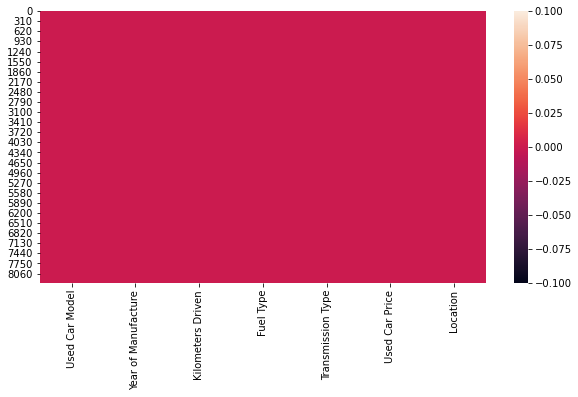

In [182]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

# Visualization

Univariate Analysis

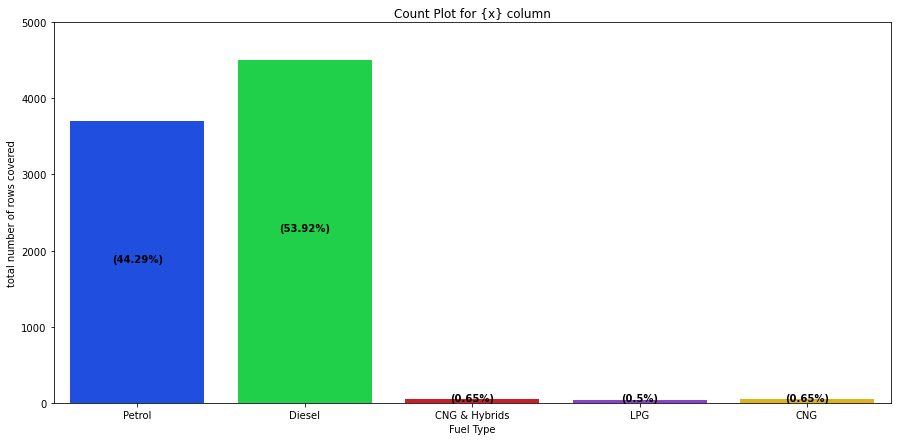

In [183]:
x = 'Fuel Type'
k=0
plt.figure(figsize=[15,7])
axes = sns.countplot(df[x])
for i in axes.patches:
    ht = i.get_height()
    ln = len(df[x])
    st = f"({round(ht*100/ln,2)}%)"
    plt.text(k, ht/2, st, ha='center', fontweight='bold')
    k += 1
plt.ylim(0,5000)
plt.title('Count Plot for {x} column')
plt.ylabel('total number of rows covered')
plt.show()

Most cars use diesel engine and then petrol variants. Most of the used cars run either on petrol or diesel. We have a minimal amount of cars that run on LPG, CNG and their hybrid versions.

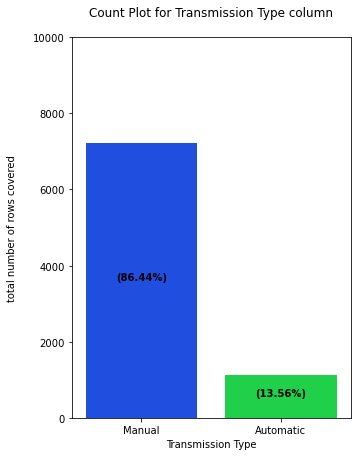

In [184]:
x = 'Transmission Type'
k=0
plt.figure(figsize=[5,7])
axes = sns.countplot(df[x])
for i in axes.patches:
    ht = i.get_height()
    ln = len(df[x])
    st = f"({round(ht*100/ln,2)}%)"
    plt.text(k, ht/2, st, ha='center', fontweight='bold')
    k += 1
plt.ylim(0,10000)
plt.title(f'Count Plot for {x} column\n')
plt.ylabel(f'total number of rows covered\n')
plt.show()


The  manual used cars are more in  number as compared to the automatic gear cars and the difference is huge.

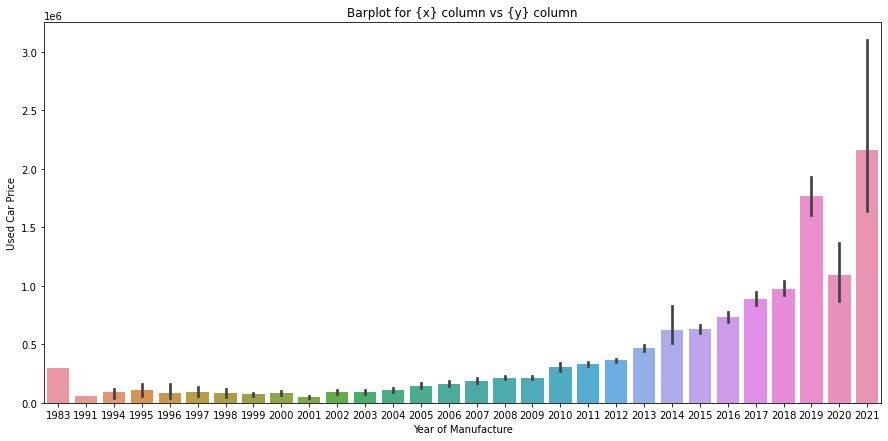

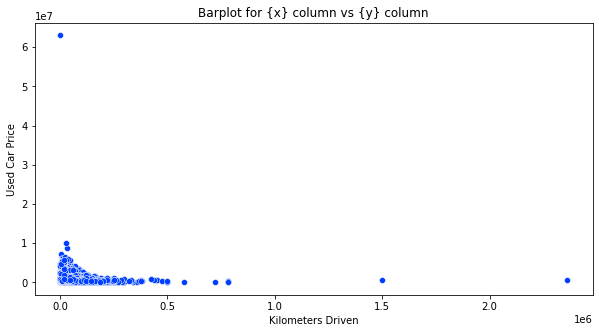

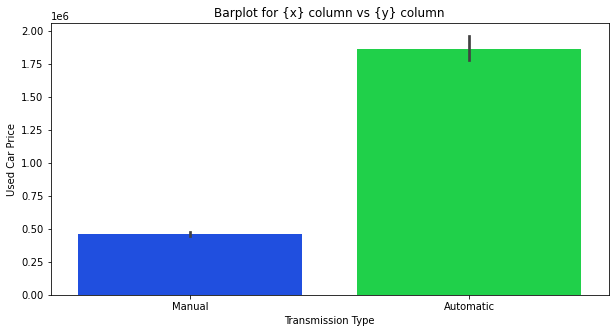

In [185]:
y = 'Used Car Price'

x = 'Year of Manufacture'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df)
plt.title("Barplot for {x} column vs {y} column")
plt.show()

x = 'Kilometers Driven'
plt.figure(figsize=[10,5])
sns.scatterplot(x,y,data=df)
plt.title("Barplot for {x} column vs {y} column")
plt.show()

x = 'Transmission Type'
plt.figure(figsize=[10,5])
sns.barplot(x,y,data=df)
plt.title("Barplot for {x} column vs {y} column")
plt.show()

Observation:
    
    With Year Of Manufacture, The cars that are manufactured after 2015 has considerably high 
    price.
    
    With Km Driven, the cars that run less km seems to have high price comparitively. This doesny suit to high class models like BMW, Audi...
    
    With Transmission type, automatic cars have high price than manually driven cars.

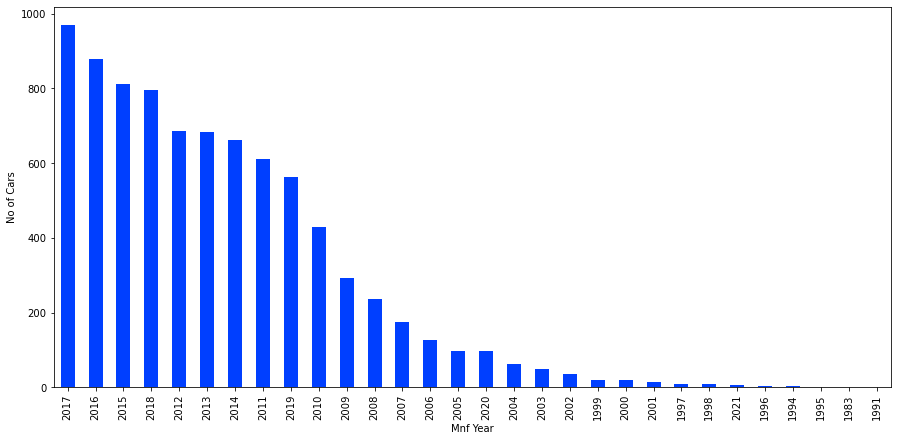

In [186]:
plt.figure(figsize=[15,7])
df['Year of Manufacture'].value_counts().plot(kind='bar')
plt.xlabel("Mnf Year")
plt.ylabel("No of Cars")
plt.show()

The number of cars being purchased each year has increased a lot after 2007. Most people started to rely on used cars with secured transfer.

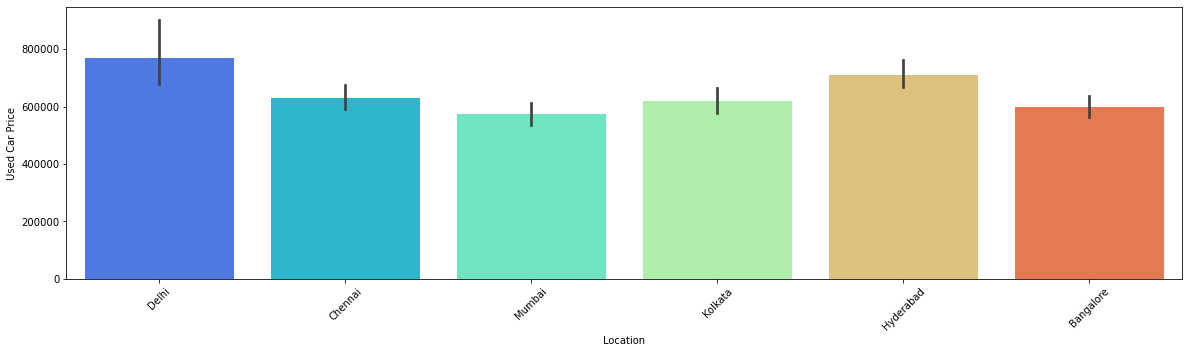

In [187]:
plt.figure(figsize=(20,5))
sns.barplot(x = "Location",y = "Used Car Price", data = df, palette = "rainbow")
plt.xticks(rotation=45)
plt.show()

Delhi and Hyderabad cars have relatively high price.

# Target Variable

<AxesSubplot:xlabel='Used Car Price', ylabel='Density'>

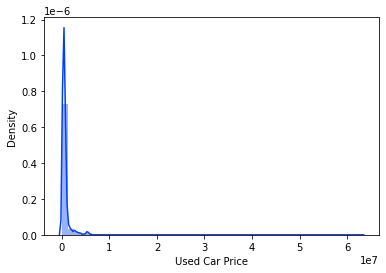

In [188]:
sns.distplot(df['Used Car Price'])

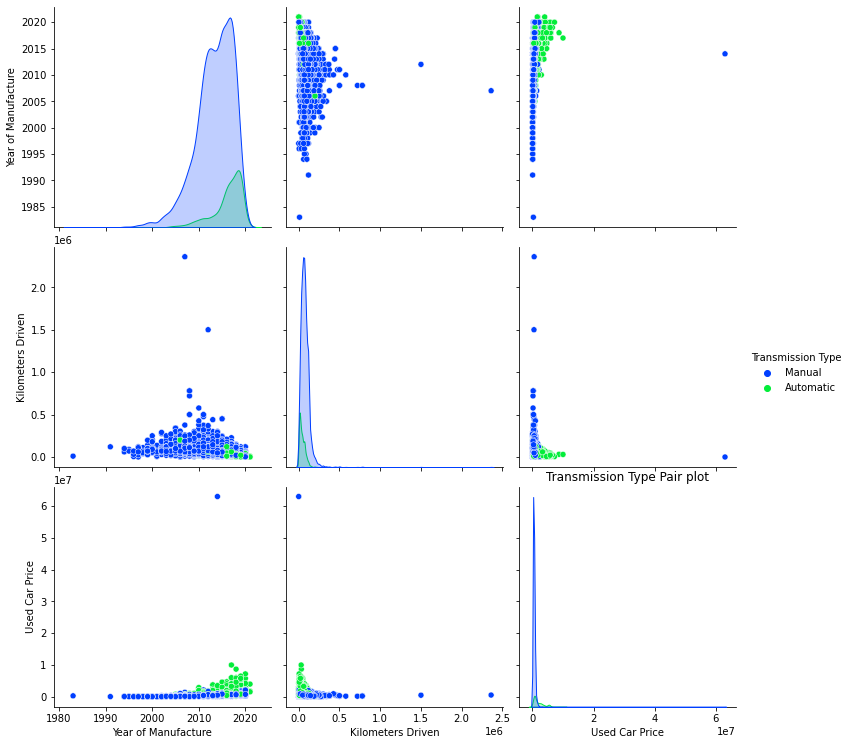

In [189]:
sns.pairplot(df, hue='Transmission Type', diag_kind="kde", kind="scatter", height=3.5)
plt.title('Transmission Type Pair plot')
plt.show()

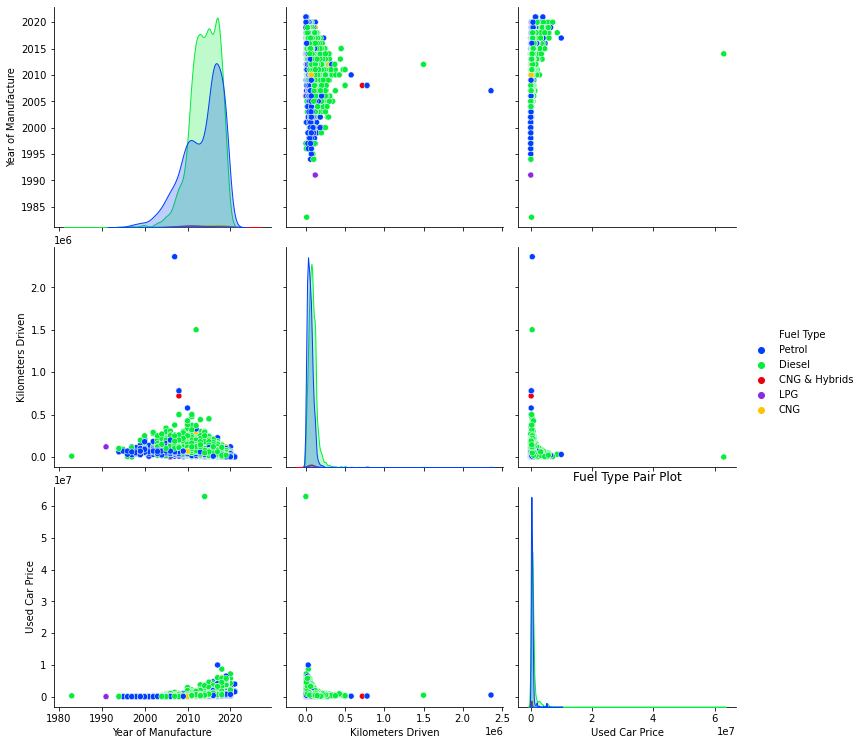

In [190]:
sns.pairplot(df, hue='Fuel Type', diag_kind="kde", kind="scatter", height=3.5)
plt.title('Fuel Type Pair Plot')
plt.show()

# Encode Categorical Columns

In [191]:
LE= LabelEncoder()

In [192]:
for i in cat_columns:
    df[i]= LE.fit_transform(df[i])

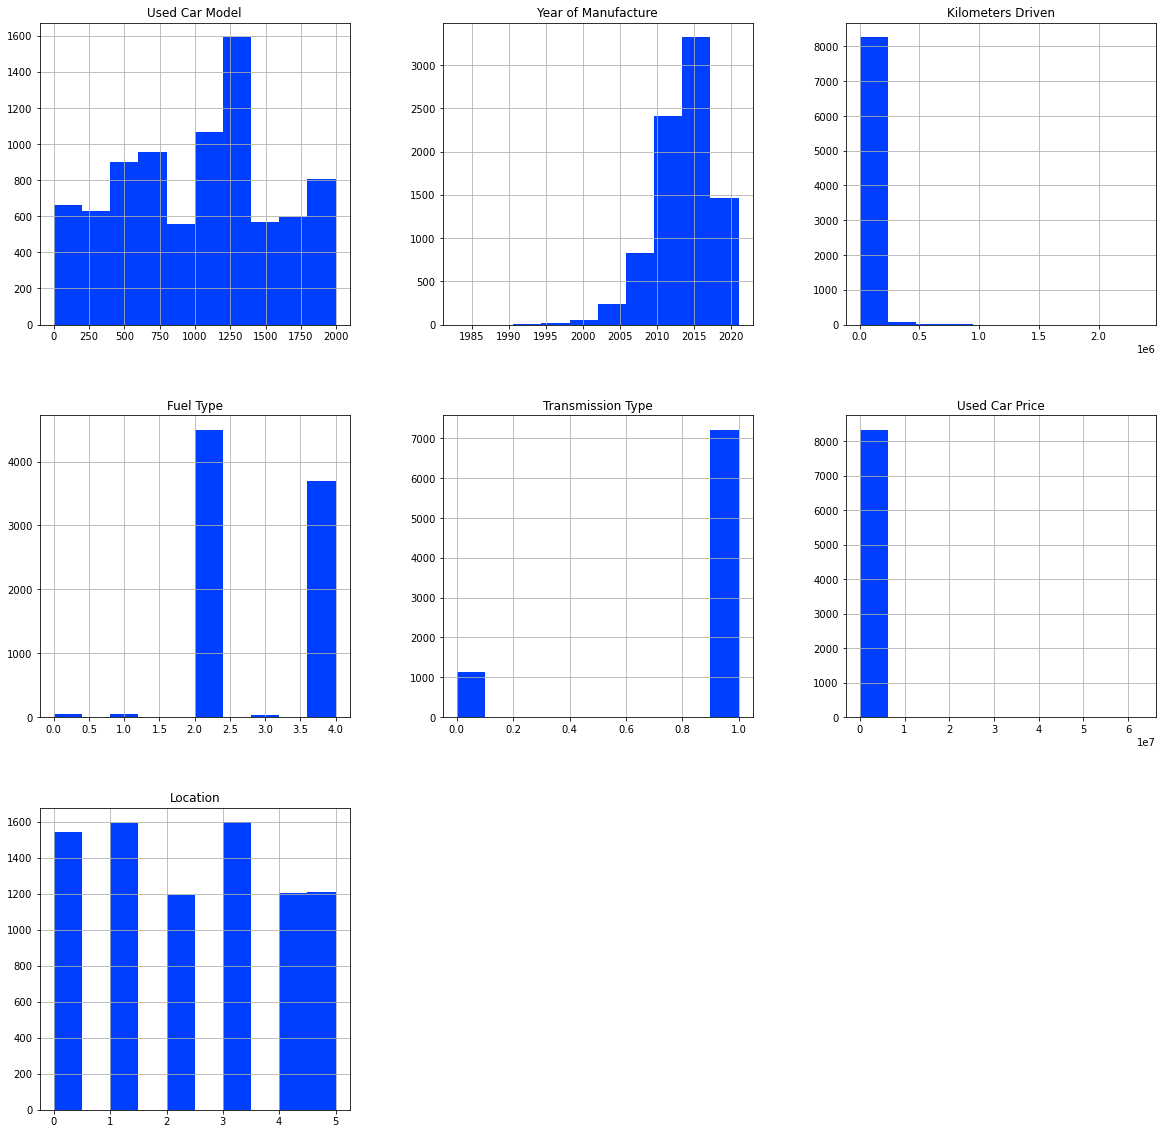

In [193]:
plt.style.use('seaborn-bright')
df.hist(figsize=(20,20))
plt.show()

With the histplot, we can understand the distribution of columns in our dataset.

In [194]:
df.describe()

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price,Location
count,8348.000000,8348.000000,8.348000e+03,8348.000000,8348.000000,8.348000e+03,8348.000000
mean,1014.285458,2013.725084,6.966386e+04,2.871346,0.864399,6.496622e+05,2.353019
std,536.701323,4.032961,5.849813e+04,1.024548,0.342385,1.063936e+06,1.697031
min,0.000000,1983.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,560.000000,2011.000000,3.500000e+04,2.000000,1.000000,2.500000e+05,1.000000
50%,1071.000000,2014.000000,6.000000e+04,2.000000,1.000000,4.500000e+05,2.000000
75%,1370.000000,2017.000000,9.000000e+04,4.000000,1.000000,6.700000e+05,4.000000
max,1994.000000,2021.000000,2.360457e+06,4.000000,1.000000,6.300000e+07,5.000000


The dataset seems to have outliers and skewness present in it. We shall handle it with proper processes

# To find Correlation

In [195]:
df.corr()

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price,Location
Used Car Model,1.000000,-0.023692,0.091993,-0.092895,0.050159,-0.066101,-0.004205
Year of Manufacture,-0.023692,1.000000,-0.395833,-0.053734,-0.239915,0.315987,-0.013616
Kilometers Driven,0.091993,-0.395833,1.000000,-0.244240,0.191012,-0.169436,0.013132
Fuel Type,-0.092895,-0.053734,-0.244240,1.000000,-0.033687,-0.145213,-0.002057
Transmission Type,0.050159,-0.239915,0.191012,-0.033687,1.000000,-0.452446,0.011880
Used Car Price,-0.066101,0.315987,-0.169436,-0.145213,-0.452446,1.000000,-0.004531
Location,-0.004205,-0.013616,0.013132,-0.002057,0.011880,-0.004531,1.000000


<AxesSubplot:>

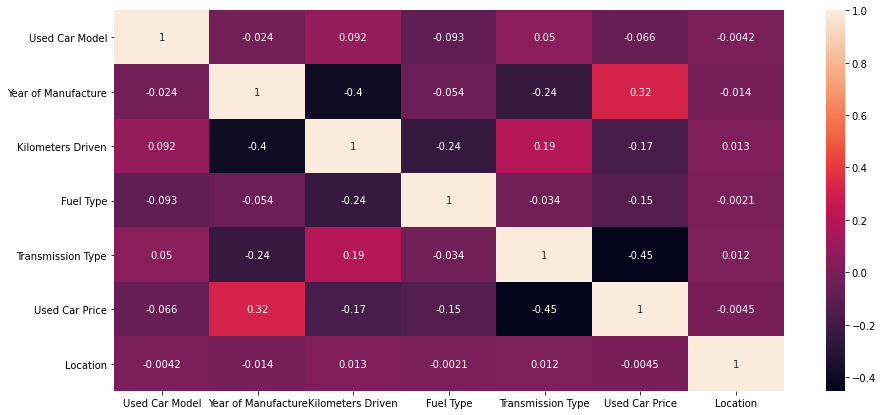

In [196]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

year of Manufacture has positive correlation with target. 

# Check For Skewness

In [197]:
df.skew().sort_values(ascending=True)

Transmission Type      -2.129099
Year of Manufacture    -1.011707
Used Car Model         -0.064684
Fuel Type               0.078609
Location                0.100319
Kilometers Driven      10.864394
Used Car Price         25.960253
dtype: float64

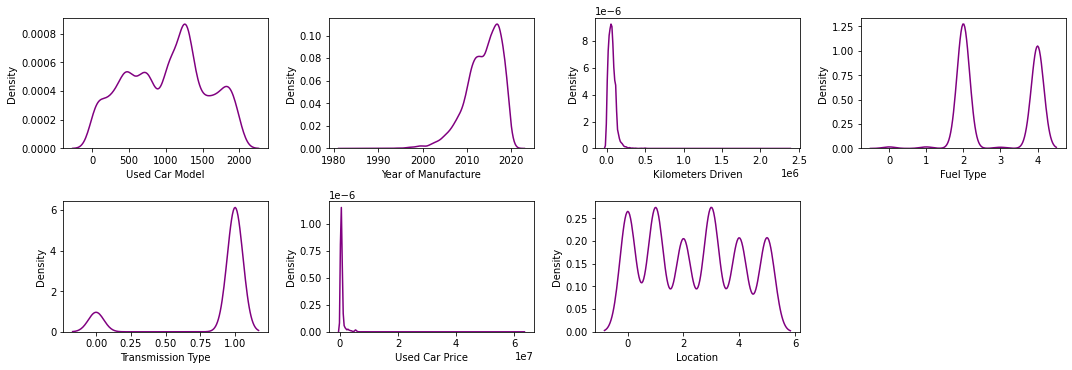

In [198]:
plt.figure(figsize=(15,15))
for i in range (0, len(df.columns)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(df[df.columns[i]], color = "purple")
    plt.tight_layout()

We see that our target column is the one showing the highest skewness and it won't be much of a concern to us. However there is slight skewness in our feature columns that will need to be treated.

In [199]:
df1=df.drop('Used Car Price', axis=1)

In [200]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [201]:
df1['Used Car Price']= df['Used Car Price']

# Check For Outliers

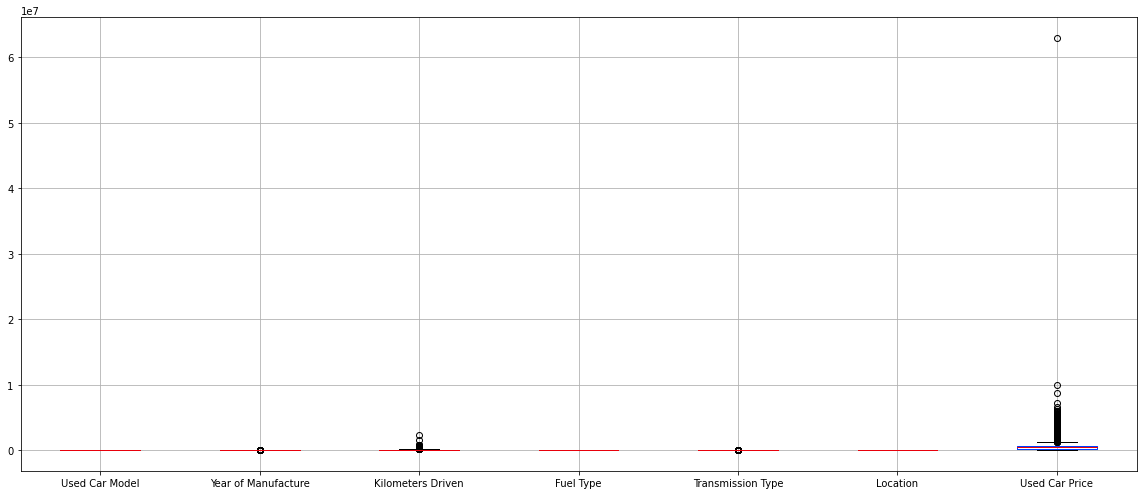

In [202]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

There are outliers present in certain columns, so we shall handle it with zscore

In [204]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.06263874e+00, 8.12086299e-01, 1.15333436e+00, ...,
        3.96072739e-01, 2.08033772e-01, 1.17177850e-01],
       [1.06263874e+00, 1.79800226e-01, 3.73301646e-01, ...,
        3.96072739e-01, 2.08033772e-01, 5.13804689e-02],
       [1.55828859e+00, 8.12086299e-01, 5.75503489e-01, ...,
        3.96072739e-01, 2.08033772e-01, 1.17812796e-01],
       ...,
       [5.31906073e-04, 1.06005793e+00, 7.57952376e-01, ...,
        3.96072739e-01, 1.38663298e+00, 3.17473037e-04],
       [4.65304424e-01, 6.75743488e-01, 8.60525904e-01, ...,
        3.96072739e-01, 1.38663298e+00, 2.06474295e-01],
       [4.99908452e-01, 1.79800226e-01, 1.27082002e+00, ...,
        3.96072739e-01, 1.38663298e+00, 2.72271675e-01]])

In [205]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold=3
print(np.where(z>3))

(array([   6,   13,   46,   53,  166,  173,  299,  311,  312,  321,  328,
        329,  335,  355,  377,  406,  413,  539,  551,  552,  568,  569,
        575,  595,  617,  641,  654,  682,  703,  705,  733,  758,  766,
        846,  899,  911,  912,  928,  929,  935,  955,  977, 1007, 1131,
       1132, 1134, 1135, 1136, 1139, 1148, 1170, 1177, 1186, 1288, 1316,
       1371, 1384, 1385, 1401, 1410, 1423, 1424, 1461, 1647, 1660, 1661,
       1774, 1808, 1886, 1998, 1999, 2025, 2045, 2071, 2078, 2091, 2092,
       2097, 2110, 2111, 2116, 2129, 2130, 2135, 2148, 2149, 2216, 2237,
       2379, 2432, 2468, 2474, 2561, 2562, 2564, 2629, 2710, 2723, 2724,
       2775, 2810, 2815, 2857, 2858, 2860, 2871, 2872, 2882, 2972, 2997,
       3006, 3036, 3094, 3140, 3145, 3272, 3327, 3340, 3402, 3424, 3579,
       3584, 3631, 3644, 3645, 3664, 3677, 3678, 3726, 3805, 3818, 3829,
       3886, 3938, 3977, 3999, 4046, 4079, 4092, 4093, 4097, 4120, 4236,
       4237, 4239, 4240, 4248, 4310, 4378, 4409, 4

In [210]:
df_new= df1[(z<3).all(axis=1)]

In [211]:
df_new.shape

(8053, 7)

In [212]:
df.shape

(8348, 7)

In [215]:
loss_percent= (8348-8053)/8348*100
loss_percent

3.53378054623862

Only 3% of the data is lost with outliers, so we shall proceed with model training

In [220]:
df1= pd.DataFrame(df_new, columns= df.columns)

# Spliting the data

In [229]:
x= df1.drop('Used Car Price', axis=1)
y=df1['Used Car Price']

The target variable is of continous type, so we shall use regression models.

# Scaling Of Features

In [231]:
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Location
0,-1.088618,0.854103,-1.566333,1.096250,0.373742,-0.206173
1,-1.088618,-0.221355,0.571814,-0.855359,0.373742,-0.206173
2,-1.589312,0.854103,-0.757045,-0.855359,0.373742,-0.206173
3,-1.346494,0.316374,0.535899,-0.855359,0.373742,-0.206173
4,0.407815,-1.027948,-0.661272,1.096250,0.373742,-0.206173


# Train the Model

In [232]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

# Check the best Random State

# Linear Regression

In [237]:
maxr2=0
maxRS=0

for i in range(1,200):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    predlr= lr.predict(xtest)
    R2=r2_score(ytest,predlr)
    if R2>maxr2:
        maxr2=R2
        maxRS=i
print("Best R2_score is", maxr2, 'on Random_state',maxRS)

Best R2_score is 0.8519386589017288 on Random_state 49


# To Find the Best Cross Validation Score

In [234]:
pred_tr= lr.predict(xtrain)
pred_ts= lr.predict(xtest)

In [235]:
train_accuracy= r2_score(ytrain,pred_tr)
test_accuracy= r2_score(ytest,pred_ts)

In [236]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.4974768879238155 and accuracy score for training is 0.49933326363470587 and the accuracy for testing is 0.6352316187683589


At cross fold 3 the cv score is 0.49763786019362016 and accuracy score for training is 0.49933326363470587 and the accuracy for testing is 0.6352316187683589


At cross fold 4 the cv score is 0.4947333451353525 and accuracy score for training is 0.49933326363470587 and the accuracy for testing is 0.6352316187683589


At cross fold 5 the cv score is 0.4944676008996935 and accuracy score for training is 0.49933326363470587 and the accuracy for testing is 0.6352316187683589


At cross fold 6 the cv score is 0.4970680575346291 and accuracy score for training is 0.49933326363470587 and the accuracy for testing is 0.6352316187683589


At cross fold 7 the cv score is 0.4909576973592659 and accuracy score for training is 0.49933326363470587 and the accuracy for testing is 0.6352316187683589


At cross fold 8 the cv score is 0.49072127921

Random_state= 49, CV score is best with cv=3. So we shall use this values to test other models as well

# Check The Accuracy and Error

In [238]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=49)

In [240]:
#Linear Regression

lr=LinearRegression()
lr.fit(xtrain,ytrain)
predlr= lr.predict(xtest)
print('R2=', r2_score(ytest,predlr))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predlr)))
print('MAE=', mean_absolute_error(ytest,predlr))

R2= 0.8519386589017288
RMSE= 151252.54390632082
MAE= 119645.55393430719


In [241]:
cv_score=cross_val_score(lr,x,y, cv=3)
print('Cross Validation Score of LinearRegression is:', cv_score.mean())

Cross Validation Score of LinearRegression is: 0.49763786019362016


In [242]:
diff= 0.8519- 0.4976
diff

0.3543

In [243]:
# Ridge Regression

rd=Ridge(alpha=1e-2, normalize=True)
rd.fit(xtrain,ytrain)
predrd= rd.predict(xtest)
print('R2=', r2_score(ytest,predrd))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predrd)))
print('MBE=', mean_absolute_error(ytest,predrd))

R2= 0.8515510878532258
RMSE= 151450.3767589356
MBE= 119017.0626608385


In [244]:
cv_score=cross_val_score(rd,x,y, cv=3)
print('Cross Validation Score of RidgeRegression is:', cv_score.mean())

Cross Validation Score of RidgeRegression is: 0.49764996821710544


In [245]:
diff= 0.8515- 0.4976
diff

0.35390000000000005

In [246]:
# Lasso Regression

ls=Lasso(alpha=1e-2, normalize=True)
ls.fit(xtrain,ytrain)
predls= ls.predict(xtest)
print('R2=', r2_score(ytest,predls))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predls)))
print('MBE=', mean_absolute_error(ytest,predls))

R2= 0.8519402068834074
RMSE= 151251.75323139835
MBE= 119644.59781313362


In [257]:
cv_score=cross_val_score(ls,x,y, cv=9)
print('Cross Validation Score of LassoRegression is:', cv_score.mean())

Cross Validation Score of LassoRegression is: 0.4972563151000655


In [248]:
diff=0.8519-0.4976
diff

0.3543

In [249]:
# Decision Tree Regressor

dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('Score:',dtc.score(xtrain,ytrain))
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,preddtc)))
print('mean_absolute_error:', mean_absolute_error(preddtc,ytest))
print('r2_score:', r2_score(preddtc,ytest))

Score: 0.9948789483167475
root_mean_squared_error 109000.63989896268
mean_absolute_error: 73670.88333333333
r2_score: 0.930146730691516


In [256]:
cv_score=cross_val_score(dtc,x,y, cv=9)
print('Cross Validation Score of DecisionTreeRegressor is:', cv_score.mean())

Cross Validation Score of DecisionTreeRegressor is: 0.7785162070515667


In [258]:
diff= 0.9301-0.7785
diff

0.15160000000000007

In [259]:
# Random Forest Regressor

rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root mean_squared_error 102860.09269043796
mean_absolute_error: 63769.345373015865
Rf Score 0.9831105004575759
r2_score: 0.9412285363230315


In [260]:
cv_score=cross_val_score(rf,x,y, cv=9)
print('Cross Validation Score of RandomForestRegressor is:', cv_score.mean())

Cross Validation Score of RandomForestRegressor is: 0.862004404437632


In [261]:
diff= 0.9412- 0.8620
diff

0.07920000000000005

In [262]:
#SVR

svc=SVR()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predsvc)))
print('mean_absolute_error:', mean_absolute_error(predsvc,ytest))
print('Score:', svc.score(xtrain,ytrain))
print('r2_score:', r2_score(predsvc,ytest))

root mean_squared_error 405223.68438796565
mean_absolute_error: 255201.56550282557
Score: -0.0482977267298883
r2_score: -1431979.7321459975


In [263]:
# K Neighbors Regressor

knn=KNeighborsRegressor()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predknn)))
print('mean_absolute_error:', mean_absolute_error(predknn,ytest))
print('Rf Score', knn.score(xtrain,ytrain))
print('r2_score:', r2_score(predknn,ytest))

root mean_squared_error 129396.7797219699
mean_absolute_error: 99130.04000000001
Rf Score 0.8294617219343752
r2_score: 0.9011673587839933


In [264]:
cv_score=cross_val_score(knn,x,y, cv=9)
print('Cross Validation Score of KNN is:', cv_score.mean())

Cross Validation Score of KNN is: 0.6775129191136643


In [265]:
diff= 0.9011-0.6775
diff

0.22360000000000002

The difference between r2 score and CV score is less with RandomForestRegressor. So we shall improve the performance of the model by Hyper Parameter Tuning.

# HyperParameter Tuning With GridSearchCV

In [266]:
from sklearn.model_selection import GridSearchCV

In [267]:
RandomForestRegressor()

RandomForestRegressor()

In [268]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'criterion':["squared_error","absolute_error", "poisson"],
            'max_depth':[3,4,5,6],
            'min_samples_split': [2,3,4,5]}

In [269]:
GCV= GridSearchCV(RandomForestRegressor(), parameters, cv=9, scoring='r2')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [270]:
GCV.best_estimator_

RandomForestRegressor(max_depth=6)

In [271]:
GCV_pred=GCV.best_estimator_.predict(xtest)
r2_score(ytest,GCV_pred)

0.59627699866985

In [297]:
#Final Model
flrf=RandomForestRegressor(max_depth=4, 
                         min_samples_split=3,
                         min_samples_leaf=3,
                         max_features= 'log2',
                         criterion = 'squared_error')
flrf.fit(xtrain,ytrain)
predrf= flrf.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root mean_squared_error 140578.05874328382
mean_absolute_error: 113477.58211537167
Rf Score 0.9831105004575759
r2_score: 0.8884742368094669


After Tuning for Hyper Parameter the accuracy has improved to 89% without underfitting or overfitting. So we shall save the model.

# Save The Model

In [298]:
import pickle
filename= 'Used_Car_Price.pkl'
pickle.dump(flrf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [299]:
x=np.array(ytest)
predicted= np.array(flrf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,180000.0,2.991580e+05
1,400000.0,6.049486e+05
2,725000.0,6.457354e+05
3,380000.0,3.973217e+05
4,375000.0,3.204233e+05
5,445000.0,5.200905e+05
6,1775000.0,1.776372e+06
7,350000.0,4.180126e+05
8,500000.0,3.397874e+05
9,260000.0,2.361668e+05


After complete analysis of the dataset, we did all the processing of the dataset to make it clean and structured to train different models to get the desired output.

RandomforestRegressor gave good results with the r2 accuracy of 89%.